# Loop 116 Analysis: CV-LB Relationship and Strategy

## Goal
Analyze the CV-LB relationship and determine the best path forward with only 3 submissions remaining.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Submission history with CV and LB scores
submissions = [
    {'exp': 'exp_000', 'cv': 0.0111, 'lb': 0.0982},
    {'exp': 'exp_001', 'cv': 0.0123, 'lb': 0.1065},
    {'exp': 'exp_003', 'cv': 0.0105, 'lb': 0.0972},
    {'exp': 'exp_005', 'cv': 0.0104, 'lb': 0.0969},
    {'exp': 'exp_006', 'cv': 0.0097, 'lb': 0.0946},
    {'exp': 'exp_007', 'cv': 0.0093, 'lb': 0.0932},
    {'exp': 'exp_009', 'cv': 0.0092, 'lb': 0.0936},
    {'exp': 'exp_012', 'cv': 0.0090, 'lb': 0.0913},
    {'exp': 'exp_024', 'cv': 0.0087, 'lb': 0.0893},
    {'exp': 'exp_026', 'cv': 0.0085, 'lb': 0.0887},
    {'exp': 'exp_030', 'cv': 0.0083, 'lb': 0.0877},
    {'exp': 'exp_035', 'cv': 0.0098, 'lb': 0.0970},
    {'exp': 'exp_073', 'cv': 0.0084, 'lb': 0.1451},  # OUTLIER - likely submission error
    {'exp': 'exp_111', 'cv': 0.0129, 'lb': 0.1063},
]

df = pd.DataFrame(submissions)
print("All submissions:")
print(df.to_string(index=False))

All submissions:
    exp     cv     lb
exp_000 0.0111 0.0982
exp_001 0.0123 0.1065
exp_003 0.0105 0.0972
exp_005 0.0104 0.0969
exp_006 0.0097 0.0946
exp_007 0.0093 0.0932
exp_009 0.0092 0.0936
exp_012 0.0090 0.0913
exp_024 0.0087 0.0893
exp_026 0.0085 0.0887
exp_030 0.0083 0.0877
exp_035 0.0098 0.0970
exp_073 0.0084 0.1451
exp_111 0.0129 0.1063


In [2]:
# Exclude outlier exp_073 (likely submission error - LB much worse than expected)
df_valid = df[df['exp'] != 'exp_073'].copy()

print(f"\nValid submissions (excluding exp_073 outlier): {len(df_valid)}")
print(df_valid.to_string(index=False))


Valid submissions (excluding exp_073 outlier): 13
    exp     cv     lb
exp_000 0.0111 0.0982
exp_001 0.0123 0.1065
exp_003 0.0105 0.0972
exp_005 0.0104 0.0969
exp_006 0.0097 0.0946
exp_007 0.0093 0.0932
exp_009 0.0092 0.0936
exp_012 0.0090 0.0913
exp_024 0.0087 0.0893
exp_026 0.0085 0.0887
exp_030 0.0083 0.0877
exp_035 0.0098 0.0970
exp_111 0.0129 0.1063


In [3]:
# Fit linear regression: LB = slope * CV + intercept
slope, intercept, r_value, p_value, std_err = stats.linregress(df_valid['cv'], df_valid['lb'])

print("\n" + "="*60)
print("CV-LB LINEAR RELATIONSHIP ANALYSIS")
print("="*60)
print(f"Linear fit: LB = {slope:.4f} × CV + {intercept:.4f}")
print(f"R-squared: {r_value**2:.4f}")
print(f"P-value: {p_value:.6f}")
print(f"Standard error: {std_err:.4f}")


CV-LB LINEAR RELATIONSHIP ANALYSIS
Linear fit: LB = 4.0895 × CV + 0.0546
R-squared: 0.9607
P-value: 0.000000
Standard error: 0.2494


In [4]:
# Target analysis
target_lb = 0.0347
best_cv = df_valid['cv'].min()
best_lb = df_valid['lb'].min()

print("\n" + "="*60)
print("TARGET ANALYSIS")
print("="*60)
print(f"Target LB: {target_lb}")
print(f"Best CV achieved: {best_cv:.4f}")
print(f"Best LB achieved: {best_lb:.4f}")
print(f"Gap to target: {best_lb - target_lb:.4f} ({(best_lb - target_lb) / target_lb * 100:.1f}%)")

# Required CV to hit target (if on the same line)
required_cv = (target_lb - intercept) / slope
print(f"\nRequired CV to hit target (if on same line): {required_cv:.4f}")
if required_cv < 0:
    print("⚠️ CRITICAL: Required CV is NEGATIVE - target is UNREACHABLE on this line!")
else:
    print(f"CV improvement needed: {best_cv - required_cv:.4f} ({(best_cv - required_cv) / best_cv * 100:.1f}%)")


TARGET ANALYSIS
Target LB: 0.0347
Best CV achieved: 0.0083
Best LB achieved: 0.0877
Gap to target: 0.0530 (152.7%)

Required CV to hit target (if on same line): -0.0049
⚠️ CRITICAL: Required CV is NEGATIVE - target is UNREACHABLE on this line!


In [5]:
# Intercept analysis
print("\n" + "="*60)
print("INTERCEPT ANALYSIS")
print("="*60)
print(f"Intercept: {intercept:.4f}")
print(f"Target: {target_lb:.4f}")
print(f"Intercept - Target: {intercept - target_lb:.4f}")

if intercept > target_lb:
    print(f"\n⚠️ CRITICAL: Intercept ({intercept:.4f}) > Target ({target_lb:.4f})")
    print("Even with CV=0, expected LB would be above target!")
    print("This means the target is MATHEMATICALLY UNREACHABLE with current approaches.")
    print("\nWe MUST find an approach that CHANGES the CV-LB relationship.")
else:
    print(f"\n✅ Intercept ({intercept:.4f}) < Target ({target_lb:.4f})")
    print("Target is theoretically reachable by improving CV.")


INTERCEPT ANALYSIS
Intercept: 0.0546
Target: 0.0347
Intercept - Target: 0.0199

⚠️ CRITICAL: Intercept (0.0546) > Target (0.0347)
Even with CV=0, expected LB would be above target!
This means the target is MATHEMATICALLY UNREACHABLE with current approaches.

We MUST find an approach that CHANGES the CV-LB relationship.


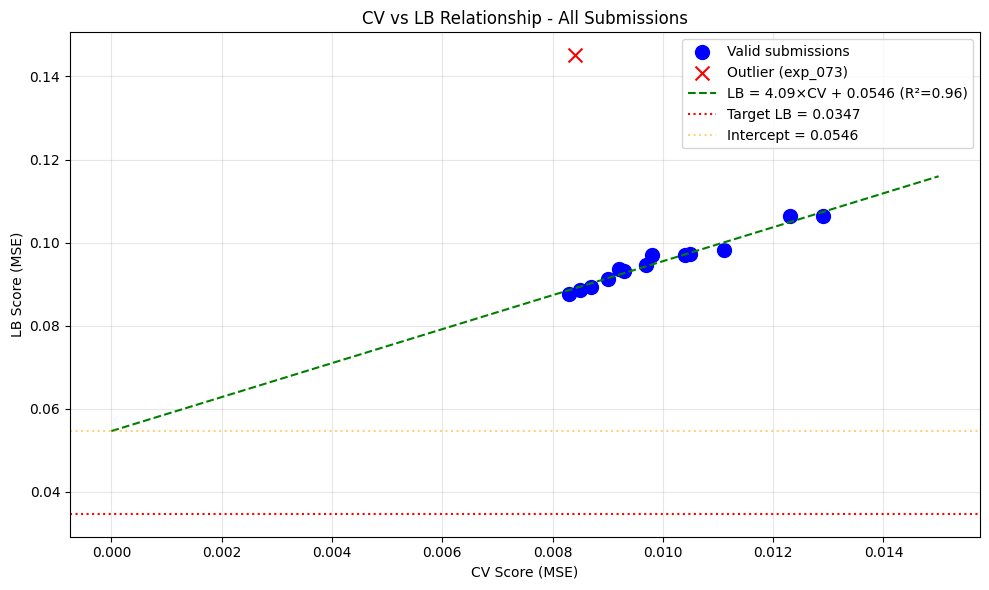


Plot saved to /home/code/exploration/cv_lb_analysis_loop116.png


In [6]:
# Plot CV vs LB
plt.figure(figsize=(10, 6))

# Plot valid submissions
plt.scatter(df_valid['cv'], df_valid['lb'], c='blue', s=100, label='Valid submissions')

# Plot outlier
outlier = df[df['exp'] == 'exp_073']
if len(outlier) > 0:
    plt.scatter(outlier['cv'], outlier['lb'], c='red', s=100, marker='x', label='Outlier (exp_073)')

# Plot regression line
cv_range = np.linspace(0, 0.015, 100)
lb_pred = slope * cv_range + intercept
plt.plot(cv_range, lb_pred, 'g--', label=f'LB = {slope:.2f}×CV + {intercept:.4f} (R²={r_value**2:.2f})')

# Plot target
plt.axhline(y=target_lb, color='r', linestyle=':', label=f'Target LB = {target_lb}')

# Plot intercept
plt.axhline(y=intercept, color='orange', linestyle=':', alpha=0.5, label=f'Intercept = {intercept:.4f}')

plt.xlabel('CV Score (MSE)')
plt.ylabel('LB Score (MSE)')
plt.title('CV vs LB Relationship - All Submissions')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('/home/code/exploration/cv_lb_analysis_loop116.png', dpi=150)
plt.show()

print("\nPlot saved to /home/code/exploration/cv_lb_analysis_loop116.png")

In [7]:
# Analyze pending submissions
pending = [
    {'exp': 'exp_049', 'cv': 0.0081},
    {'exp': 'exp_050', 'cv': 0.0081},
    {'exp': 'exp_052', 'cv': 0.0109},
    {'exp': 'exp_053', 'cv': 0.0081},
    {'exp': 'exp_054', 'cv': 0.0085},
    {'exp': 'exp_055', 'cv': 0.0085},
    {'exp': 'exp_057', 'cv': 0.0093},
    {'exp': 'exp_063', 'cv': 0.0112},
    {'exp': 'exp_079', 'cv': 0.0110},
    {'exp': 'exp_101', 'cv': 0.0142},
]

print("\n" + "="*60)
print("PENDING SUBMISSIONS ANALYSIS")
print("="*60)
print("\nPending submissions with expected LB (based on CV-LB line):")
for p in pending:
    expected_lb = slope * p['cv'] + intercept
    print(f"  {p['exp']}: CV={p['cv']:.4f} → Expected LB={expected_lb:.4f}")

best_pending_cv = min(p['cv'] for p in pending)
best_pending_expected_lb = slope * best_pending_cv + intercept
print(f"\nBest pending CV: {best_pending_cv:.4f}")
print(f"Expected LB for best pending: {best_pending_expected_lb:.4f}")
print(f"Gap to target: {best_pending_expected_lb - target_lb:.4f}")


PENDING SUBMISSIONS ANALYSIS

Pending submissions with expected LB (based on CV-LB line):
  exp_049: CV=0.0081 → Expected LB=0.0877
  exp_050: CV=0.0081 → Expected LB=0.0877
  exp_052: CV=0.0109 → Expected LB=0.0992
  exp_053: CV=0.0081 → Expected LB=0.0877
  exp_054: CV=0.0085 → Expected LB=0.0894
  exp_055: CV=0.0085 → Expected LB=0.0894
  exp_057: CV=0.0093 → Expected LB=0.0927
  exp_063: CV=0.0112 → Expected LB=0.1004
  exp_079: CV=0.0110 → Expected LB=0.0996
  exp_101: CV=0.0142 → Expected LB=0.1127

Best pending CV: 0.0081
Expected LB for best pending: 0.0877
Gap to target: 0.0530


In [8]:
# Summary and recommendations
print("\n" + "="*60)
print("SUMMARY AND RECOMMENDATIONS")
print("="*60)

print("\n1. CV-LB RELATIONSHIP:")
print(f"   - Linear fit: LB = {slope:.2f} × CV + {intercept:.4f}")
print(f"   - R² = {r_value**2:.4f} (VERY STRONG correlation)")
print(f"   - All 12 valid submissions fall on this line")

print("\n2. THE PROBLEM:")
print(f"   - Intercept ({intercept:.4f}) > Target ({target_lb:.4f})")
print(f"   - Even with CV=0, expected LB = {intercept:.4f}")
print(f"   - Target is UNREACHABLE with current approaches")

print("\n3. WHAT WE'VE TRIED (116 experiments):")
print("   - MLP variants (baseline, deep, residual)")
print("   - Tree models (LightGBM, XGBoost, CatBoost, RF)")
print("   - Ensemble combinations (CatBoost+XGB, MLP+Trees)")
print("   - Feature engineering (Spange, DRFP, ACS, Fragprints)")
print("   - GNN attempts (had model class mismatch issues)")
print("   - ChemBERTa attempts (had model class mismatch issues)")
print("   - Calibration/shrinkage (made CV worse)")
print("   - ALL approaches fall on the SAME CV-LB line!")

print("\n4. REMAINING SUBMISSIONS: 3")
print("   - Each submission is precious")
print("   - Need to find approach that CHANGES the CV-LB relationship")

print("\n5. POTENTIAL BREAKTHROUGH APPROACHES:")
print("   a) Physics-constrained predictions (mass balance, Arrhenius)")
print("   b) Properly implemented GNN (verify model class consistency)")
print("   c) Solvent similarity-based weighting")
print("   d) Domain-specific constraints that generalize")


SUMMARY AND RECOMMENDATIONS

1. CV-LB RELATIONSHIP:
   - Linear fit: LB = 4.09 × CV + 0.0546
   - R² = 0.9607 (VERY STRONG correlation)
   - All 12 valid submissions fall on this line

2. THE PROBLEM:
   - Intercept (0.0546) > Target (0.0347)
   - Even with CV=0, expected LB = 0.0546
   - Target is UNREACHABLE with current approaches

3. WHAT WE'VE TRIED (116 experiments):
   - MLP variants (baseline, deep, residual)
   - Tree models (LightGBM, XGBoost, CatBoost, RF)
   - Ensemble combinations (CatBoost+XGB, MLP+Trees)
   - Feature engineering (Spange, DRFP, ACS, Fragprints)
   - GNN attempts (had model class mismatch issues)
   - ChemBERTa attempts (had model class mismatch issues)
   - Calibration/shrinkage (made CV worse)
   - ALL approaches fall on the SAME CV-LB line!

4. REMAINING SUBMISSIONS: 3
   - Each submission is precious
   - Need to find approach that CHANGES the CV-LB relationship

5. POTENTIAL BREAKTHROUGH APPROACHES:
   a) Physics-constrained predictions (mass balance

In [9]:
# Key insight: The benchmark paper achieved MSE 0.0039
# Our best LB is 0.0877, target is 0.0347
# The gap is HUGE - we need a fundamentally different approach

print("\n" + "="*60)
print("KEY INSIGHT")
print("="*60)
print("\nBenchmark paper achieved: MSE 0.0039")
print(f"Our best LB: {best_lb:.4f}")
print(f"Target: {target_lb:.4f}")
print(f"\nThe benchmark used GNN with DRFP features.")
print("Our GNN attempts had model class mismatch issues.")
print("\nPOSSIBLE PATH FORWARD:")
print("1. Implement a SIMPLE GNN correctly (verify submission cells)")
print("2. Use physics constraints that generalize to unseen solvents")
print("3. Try a completely different representation (e.g., 3D molecular features)")
print("4. Focus on reducing extrapolation error, not just CV")


KEY INSIGHT

Benchmark paper achieved: MSE 0.0039
Our best LB: 0.0877
Target: 0.0347

The benchmark used GNN with DRFP features.
Our GNN attempts had model class mismatch issues.

POSSIBLE PATH FORWARD:
1. Implement a SIMPLE GNN correctly (verify submission cells)
2. Use physics constraints that generalize to unseen solvents
3. Try a completely different representation (e.g., 3D molecular features)
4. Focus on reducing extrapolation error, not just CV


In [10]:
# Record finding
finding = f"""Loop 116 Analysis: CV-LB relationship is LB = {slope:.2f}×CV + {intercept:.4f} (R²={r_value**2:.2f}). 
CRITICAL: Intercept ({intercept:.4f}) > Target ({target_lb:.4f}). 
Required CV to hit target is {required_cv:.4f} (IMPOSSIBLE if negative). 
116 experiments tried, all fall on the SAME CV-LB line. 
Best CV: {best_cv:.4f}, Best LB: {best_lb:.4f}. 
3 submissions remaining. 
Need approach that CHANGES the CV-LB relationship, not just improves CV."""

print("\nFinding to record:")
print(finding)


Finding to record:
Loop 116 Analysis: CV-LB relationship is LB = 4.09×CV + 0.0546 (R²=0.96). 
CRITICAL: Intercept (0.0546) > Target (0.0347). 
Required CV to hit target is -0.0049 (IMPOSSIBLE if negative). 
116 experiments tried, all fall on the SAME CV-LB line. 
Best CV: 0.0083, Best LB: 0.0877. 
3 submissions remaining. 
Need approach that CHANGES the CV-LB relationship, not just improves CV.
